In [ ]:
# 3. A particular linear process has an input (x=5) and output (y=10) 

#     a. Create a model using numpy to solve for “y” and record your best error. 

#     b. Repeat the above experiment with different hyper parameters like Learning Rate & activation function. 

#     c. Record the various hyperparameters used in experiment and submit the table with data (x | y | y_pred | error (RMSE) | LR | activation used). 

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

# a. Create a model using numpy to solve for “y” and record your best error.

In [ ]:
# Training data

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]
# print(n_samples)

In [ ]:
# Test Data

test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

In [ ]:
# Set placeholders for feature and target vectors
X = tf.compat.v1.placeholder(tf.float32)
y = tf.compat.v1.placeholder(tf.float32)

In [ ]:
# Set model weights and bias
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [ ]:
# Construct a linear model (y)
linear_model = (W*X + b)

# b. Repeat the above experiment with different hyper parameters like Learning Rate & activation function.

In [ ]:
# Model Parameters

learning_rate = 0.01
training_epochs = 2000
display_step = 200

In [ ]:
# Mean squared error
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)
 
# Gradient descent
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
# Initializing the variables
init = tf.compat.v1.global_variables_initializer()

Epoch:   200 	 Cost:   0.08518 	 W:0.3031 	 b:0.4337
Epoch:   400 	 Cost:   0.08201 	 W: 0.292 	 b:0.5124
Epoch:   600 	 Cost:   0.08005 	 W:0.2833 	 b:0.5742
Epoch:   800 	 Cost:   0.07885 	 W:0.2765 	 b:0.6226
Epoch:  1000 	 Cost:   0.07811 	 W:0.2711 	 b:0.6606
Epoch:  1200 	 Cost:   0.07766 	 W:0.2669 	 b:0.6904
Epoch:  1400 	 Cost:   0.07738 	 W:0.2636 	 b:0.7138
Epoch:  1600 	 Cost:    0.0772 	 W: 0.261 	 b:0.7321
Epoch:  1800 	 Cost:    0.0771 	 W: 0.259 	 b:0.7465
Epoch:  2000 	 Cost:   0.07703 	 W:0.2574 	 b:0.7578
Optimization Finished!
Final training cost: 0.07703299 W: 0.2574209 b: 0.7577814 



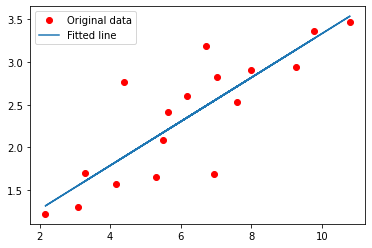

Final testing cost: 0.077228
Absolute mean square loss difference: 0.0001950115


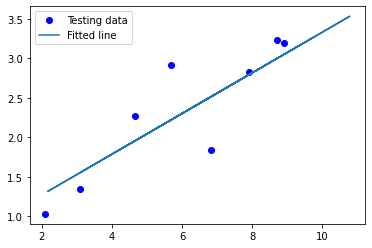

In [ ]:
# Launch the graph
with tf.compat.v1.Session() as sess:
    # Load initialized variables in current session
    sess.run(init)
 
    # Fitting all training data
    for epoch in range(training_epochs):
 
        # perform gradient descent step
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})
         
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".
                  format(epoch+1, c, sess.run(W), sess.run(b)))
             
    # Print final parameter values
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print("Final training cost:", training_cost, "W:", sess.run(W), "b:",
          sess.run(b), '\n')
    
    # Graphic display
    plt.plot(train_X, train_y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing the model
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]),
                            feed_dict={X: test_X, y: test_y})
     
    print("Final testing cost:", testing_cost)
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost))
 
    # Display fitted line on test data
    plt.plot(test_X, test_y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()    

# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
train_Xx = train_X.reshape(-1,1)
test_Xx = test_X.reshape(-1,1)

In [ ]:
[train_Xx.shape, train_y.shape, test_Xx.shape, test_y.shape]

[(17, 1), (17,), (8, 1), (8,)]

In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(Dense(units = 1))
model.add(Dense(1, activation = 'linear'))

In [ ]:
#Model Compilation
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
#Model Fit
model.fit(x=train_Xx, y=train_y, epochs = 600, validation_data = (test_Xx, test_y))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             multiple                  2         
                                                                 
 dense_5 (Dense)             multiple                  2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(test_Xx)

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# c. Record the various hyperparameters used in experiment and submit the table with data (x | y | y_pred | error (RMSE) | LR | activation used). 

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test_y, y_pred, squared=False)

report = pd.DataFrame()

report['Test_Value'] = test_X
report['Real_output'] = test_y
report['Predicted_output'] = y_pred
report['error'] = RMSE
report['LR'] = 0.001
report['activation_function'] = 'linear'

report

,Test_Value,Real_output,Predicted_output,error,LR,activation_function
0,6.830,1.840,2.293789,0.530644,0.001,linear
1,4.668,2.273,1.954480,0.530644,0.001,linear
2,8.900,3.200,2.618659,0.530644,0.001,linear
3,7.910,2.831,2.463287,0.530644,0.001,linear
4,5.700,2.920,2.116444,0.530644,0.001,linear
5,8.700,3.240,2.587271,0.530644,0.001,linear
6,3.100,1.350,1.708394,0.530644,0.001,linear
7,2.100,1.030,1.551452,0.530644,0.001,linear


In [ ]:
# input (x=5) and output (y=10) 
x, y = 5, 10
x = np.array(x)
y = np.array(y)
Xx = x.reshape(-1,1)
Yy = y.reshape(-1,1)

y_pred1 = model.predict(Xx)
err = mean_squared_error(Yy, y_pred1, squared=False)
print("Input: ",x,"\nOriginal output: ",y ,"\nObtained_output: ", str(y_pred1),"\nMean squared error: " ,err)

Input:  5 
Original output:  10 
Obtained_output:  [[2.6710389]] 
Mean squared error:  7.328961133956909
